In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
input_file = open('20210701_░ц▒т71╣┘1001.TXT','r', encoding='cp949')
data = input_file.read()

Error: Session cannot generate requests

In [ ]:
# data[:78] # init_data

df = pd.DataFrame(columns=['daily_dist','total_dist','event_date','velocity(km/h)',
                           'RPM','break_on','lat','lon','angle','acc_x','acc_y','status'])

i=0
while True:
    line = data[76+i*68:144+i*68]
    if line=='':break
    df.loc[i]=[line[:4],line[4:11],line[11:25],line[25:28],line[28:32],
               line[32:33],line[33:42],line[42:51],line[51:54],line[54:60],line[60:66],line[66:68]]
    i+=1
    if i%20000==0:break

In [ ]:
for i in df.index:
    try:df.loc[i,['velocity(km/h)','RPM','angle','acc_x','acc_y']].astype(float)
    except:df.loc[i]=(df.loc[i-1].astype(float)+df.loc[i+1].astype(float))/2

[]

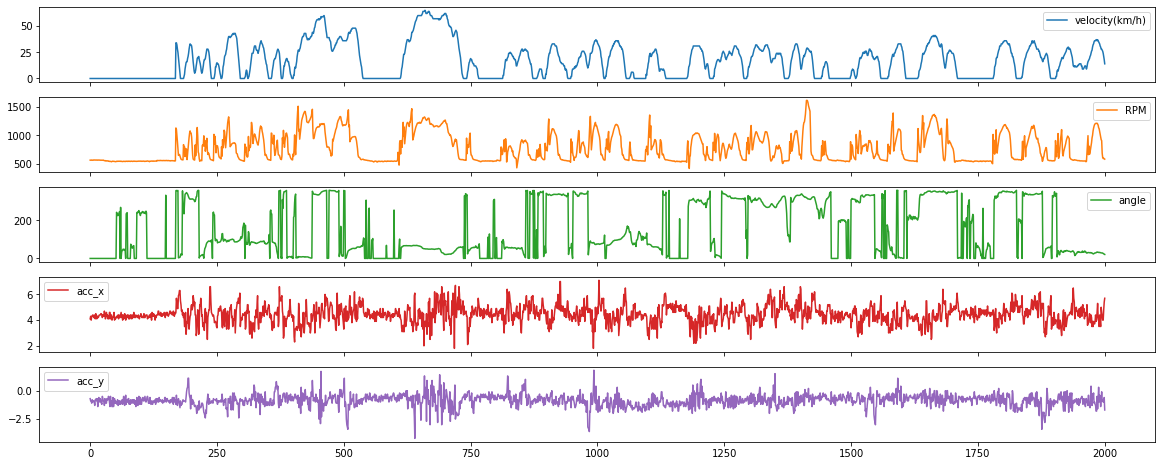

In [ ]:
df_sample = df.loc[:2000]
df_sample[['velocity(km/h)','RPM','angle','acc_x','acc_y']].astype(float).plot(subplots=True, figsize=(20, 8))
plt.legend(loc='best')
plt.plot()

[]

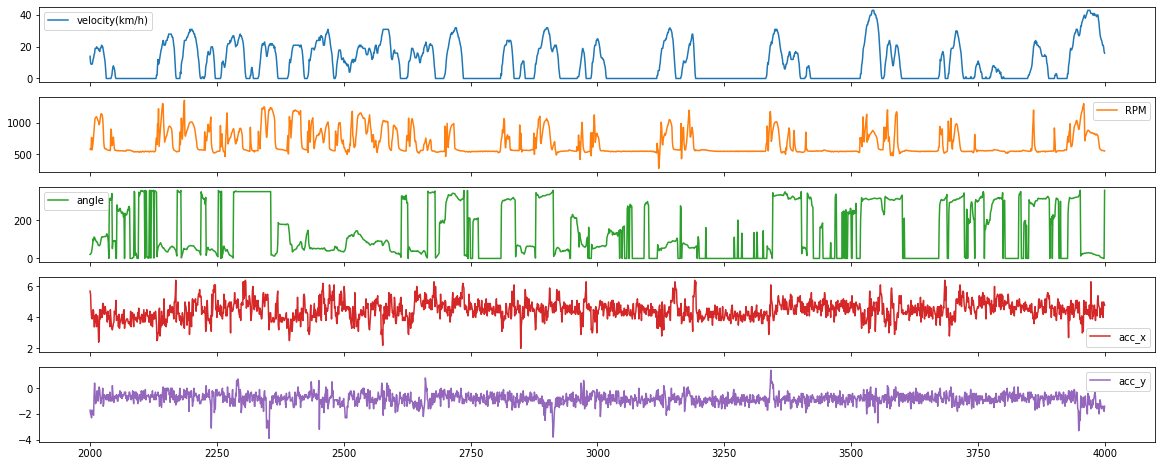

In [ ]:
df_sample = df.loc[2000:4000]
df_sample[['velocity(km/h)','RPM','angle','acc_x','acc_y']].astype(float).plot(subplots=True, figsize=(20, 8))
plt.legend(loc='best')
plt.plot()

[]

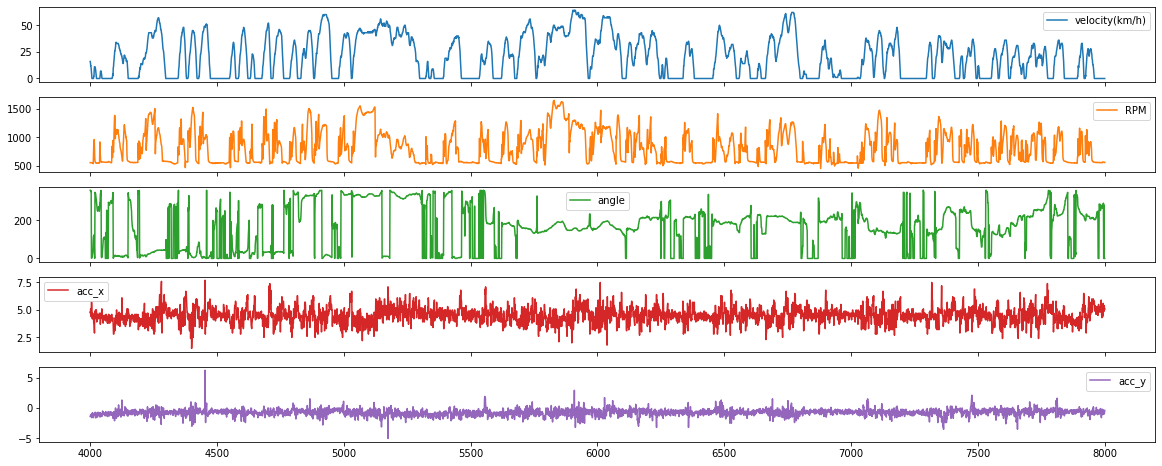

In [ ]:
df_sample = df.loc[4000:8000]
df_sample[['velocity(km/h)','RPM','angle','acc_x','acc_y']].astype(float).plot(subplots=True, figsize=(20, 8))
plt.legend(loc='best')
plt.plot()

In [ ]:
import numpy as np
from scipy.stats import norm
from densratio import densratio
import ray
import parmap
import multiprocessing

np.random.seed(1)

def dissimmirality(x,y,n,obj):
    return 1/(2*n)*(obj.compute_density_ratio(y)**2).sum()+\
        (1/n)*obj.compute_density_ratio(x).sum()-\
            1./2

@ray.remote
def function(i,data):
    x = data[i:i+15]
    y = data[i+15:i+30]
    densratio_obj = densratio(x, y, alpha=0,verbose=False)
    dissim = dissimmirality(x,y,15,densratio_obj)
    return dissim

KeyboardInterrupt: 

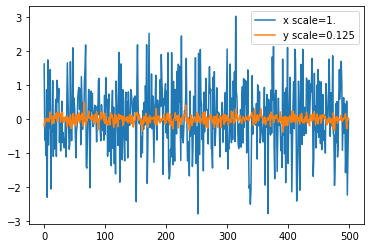

In [ ]:
x = norm.rvs(size=500, loc=0, scale=1.)
y = norm.rvs(size=500, loc=0, scale=1./8)

plt.plot(x,label='x scale=1.')
plt.plot(y,label='y scale=0.125')
plt.legend()

alpha = 0.1
densratio_obj = densratio(x, y, alpha=alpha, verbose=False)
print(densratio_obj)
dissim=dissimmirality.remote(x,y,500,densratio_obj)
plt.title(f'dis-simmilarity = {dissim:.2f}')

Method: RuLSIF

Alpha: 0.1

Kernel Information:
  Kernel type: Gaussian
  Number of kernels: 100
  Bandwidth(sigma): 0.1
  Centers: matrix([[ 0.34110762],..

Kernel Weights (theta):
  array([4.56265297e-02, 0.00000000e+00, 2.04468766e+00, 8.69739008e-01,..

Regularization Parameter (lambda): 0.001

Alpha-Relative PE-Divergence: 0.6339543147144813

Alpha-Relative KL-Divergence: 0.5530621245934497

Function to Estimate Density Ratio:
  compute_density_ratio(x)
  


Text(0.5, 1.0, 'dis-simmilarity = 3.14')

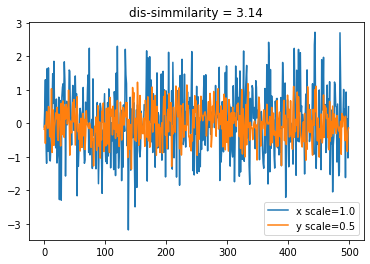

In [ ]:
x = norm.rvs(size=500, loc=0, scale=1.)
y = norm.rvs(size=500, loc=0, scale=0.5)

plt.plot(x,label='x scale=1.0')
plt.plot(y,label='y scale=0.5')
plt.legend()

alpha = 0.1
densratio_obj = densratio(x, y, alpha=alpha, verbose=False)
print(densratio_obj)
dissim=dissimmirality(x,y,500,densratio_obj)
plt.title(f'dis-simmilarity = {dissim:.2f}')

Method: RuLSIF

Alpha: 0.1

Kernel Information:
  Kernel type: Gaussian
  Number of kernels: 100
  Bandwidth(sigma): 1.0
  Centers: matrix([[ 1.24386862e+00],..

Kernel Weights (theta):
  array([0.01532668, 0.01666124, 0.02116604, 0.02309439, 0.02073589,..

Regularization Parameter (lambda): 1.0

Alpha-Relative PE-Divergence: 0.08109457832024991

Alpha-Relative KL-Divergence: 0.05545556629265681

Function to Estimate Density Ratio:
  compute_density_ratio(x)
  


Text(0.5, 1.0, 'dis-simmilarity = 1.15')

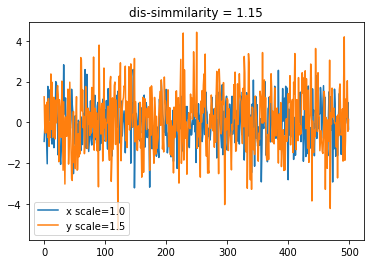

In [ ]:
x = norm.rvs(size=500, loc=0, scale=1.)
y = norm.rvs(size=500, loc=0, scale=1.5)

plt.plot(x,label='x scale=1.0')
plt.plot(y,label='y scale=1.5')
plt.legend()

alpha = 0.1
densratio_obj = densratio(x, y, alpha=alpha, verbose=False)
print(densratio_obj)
dissim=dissimmirality(x,y,500,densratio_obj)
plt.title(f'dis-simmilarity = {dissim:.2f}')

Method: RuLSIF

Alpha: 0.1

Kernel Information:
  Kernel type: Gaussian
  Number of kernels: 100
  Bandwidth(sigma): 1.0
  Centers: matrix([[-0.54756358],..

Kernel Weights (theta):
  array([0.01369799, 0.01226619, 0.00025024, 0. , 0.00814393,..

Regularization Parameter (lambda): 0.1

Alpha-Relative PE-Divergence: 0.007577044949230061

Alpha-Relative KL-Divergence: 0.048004949704060475

Function to Estimate Density Ratio:
  compute_density_ratio(x)
  


Text(0.5, 1.0, 'dis-simmilarity = 1.11')

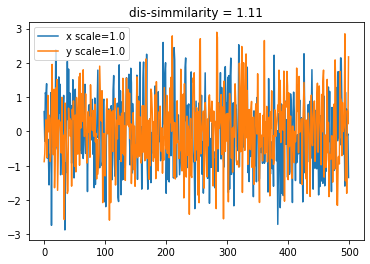

In [ ]:
x = norm.rvs(size=500, loc=0, scale=1.)
y = norm.rvs(size=500, loc=0, scale=1.)

plt.plot(x,label='x scale=1.0')
plt.plot(y,label='y scale=1.0')
plt.legend()

alpha = 0.1
densratio_obj = densratio(x, y, alpha=alpha, verbose=False)
print(densratio_obj)
dissim=dissimmirality(x,y,500,densratio_obj)
plt.title(f'dis-simmilarity = {dissim:.2f}')

In [ ]:
df['yaw_rate'] = None
df['acceleration'] = None
for idx1,idx2 in zip(df.index[:-1],df.index[1:]):
    yaw1,vel1 = df.loc[idx1,['angle','velocity(km/h)']]
    yaw2,vel2 = df.loc[idx2,['angle','velocity(km/h)']]
    df.loc[idx2,'yaw_rate'] = float(yaw2)-float(yaw1)
    df.loc[idx2,'acceleration'] = float(vel2)-float(vel1)

In [ ]:
df.head()

,daily_dist,total_dist,event_date,velocity(km/h),RPM,break_on,lat,lon,angle,acc_x,acc_y,status,yaw_rate,acceleration
0,0000,0138101,21070104170800,000,0568,0,126959101,037303219,000,+004.1,-000.7,00,None,None
1,0000,0138101,21070104170900,000,0567,0,126959101,037303219,000,+004.3,-000.9,00,0.0,0.0
2,0000,0138101,21070104171000,000,0566,0,126959101,037303219,000,+004.0,-000.9,00,0.0,0.0
3,0000,0138101,21070104171100,000,0570,0,126959101,037303219,000,+004.3,-001.1,00,0.0,0.0
4,0000,0138101,21070104171200,000,0568,0,126959101,037303219,000,+004.3,-000.8,00,0.0,0.0


[]

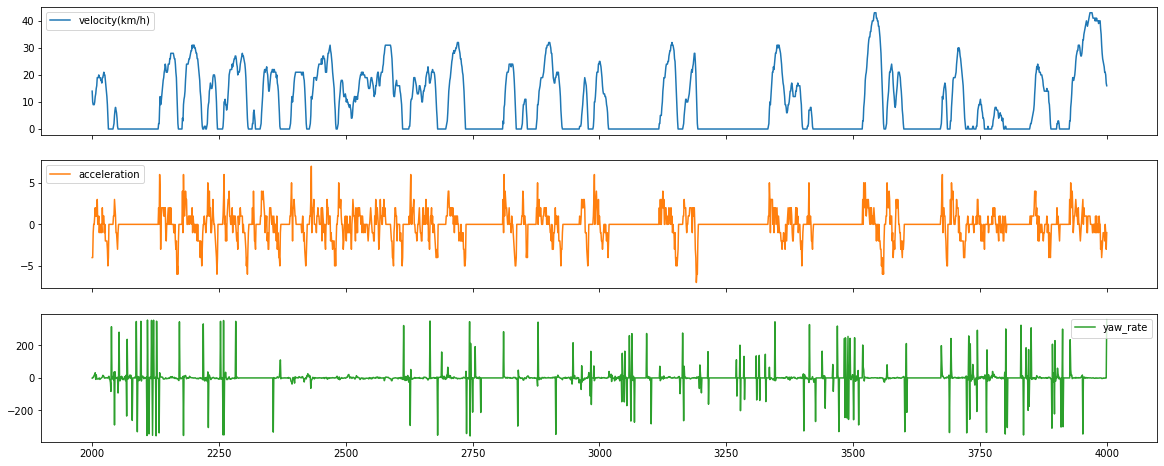

In [ ]:
df_sample = df.loc[2000:4000]
df_sample[['velocity(km/h)','acceleration','yaw_rate']].astype(float).plot(subplots=True, figsize=(20, 8))
plt.legend(loc='best')
plt.plot()

In [ ]:
@ray.remote
def dissimmirality(x,y,n,obj):
    return 1/(2*n)*(obj.compute_density_ratio(y)**2).sum()+\
        (1/n)*obj.compute_density_ratio(x).sum()-\
            1./2

@ray.remote
def function(i,data):
    x = data[i:i+15]
    y = data[i+15:i+30]
    densratio_obj = densratio(x, y, alpha=0,verbose=False)
    dissim = dissimmirality.remote(x,y,15,densratio_obj)
    return dissim

In [ ]:
data = df[['velocity(km/h)','acceleration','yaw_rate']].astype(float).values[1:]
num_cores = multiprocessing.cpu_count()
input_list = range(len(data)-30)
result = ray.get([function.remote(i,data) for i in input_list])
result = [ray.get(i) for i in result]+[0]*15
result = np.concatenate((data[15:], np.array(result).reshape(-1,1)), axis = 1)

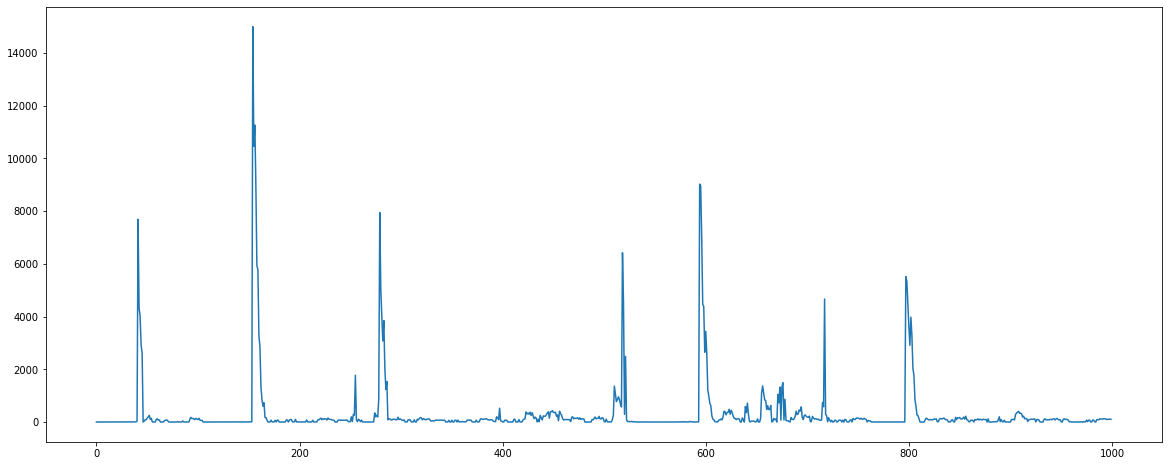

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(result[:1000])

[]

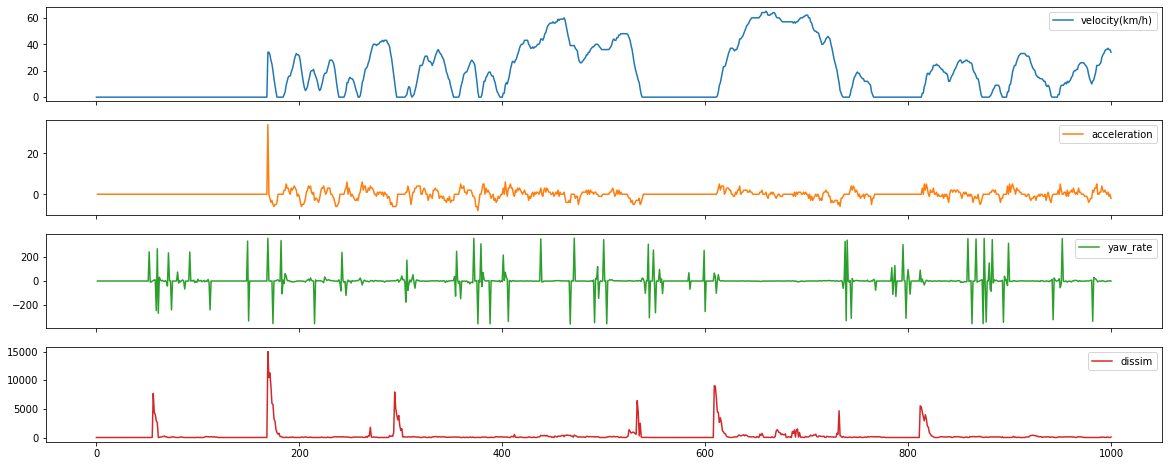

In [ ]:
df_sample = df.loc[:1000]
df_sample[['velocity(km/h)','acceleration','yaw_rate','dissim']].astype(float).plot(subplots=True, figsize=(20, 8))
plt.legend(loc='best')
plt.plot()

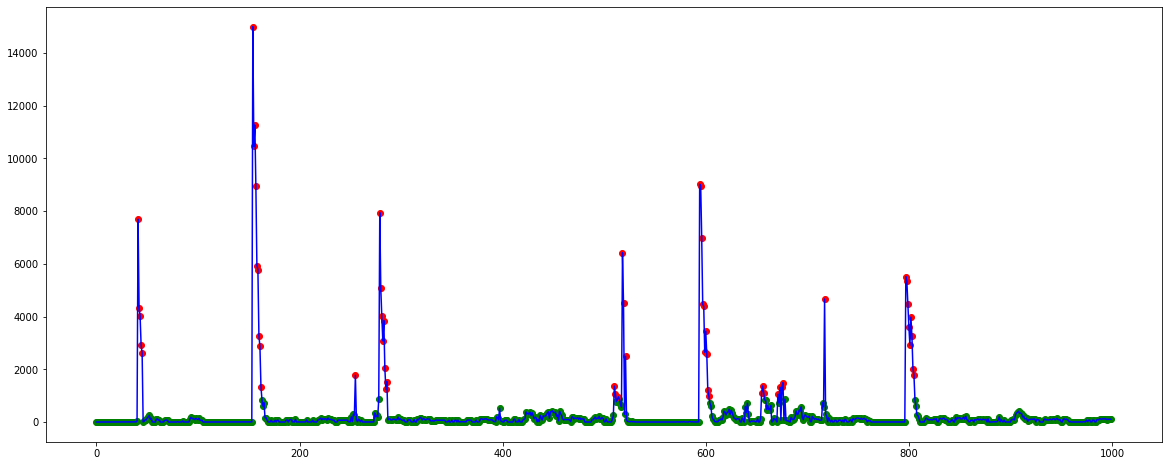

In [ ]:
# The x and y data to plot
y = np.array(result[:1000])
x = np.arange(len(result[:1000]))

# Threshold above which the markers should be red
threshold = np.quantile(result,0.95)

# Create figure
plt.figure(figsize=(20,8))

# Plot the line
plt.plot(x, y, color='blue')

# Add below threshold markers
below_threshold = y < threshold
plt.scatter(x[below_threshold], y[below_threshold], color='green') 

# Add above threshold markers
above_threshold = np.logical_not(below_threshold)
plt.scatter(x[above_threshold], y[above_threshold], color='red') 

In [ ]:
threshold

915.1535923921688

In [ ]:
detected = []
for idx in df.index:
    if df.loc[idx,'dissim']>threshold:
        values = df.loc[idx:idx+14,['velocity(km/h)','acceleration','yaw_rate']].astype(float).values.tolist()
        detected.append(values)


In [ ]:
dataset_arr = np.array(detected)

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class TensorDataset(torch.utils.data.Dataset):
    def __init__(self,x):
        self.x = x
    def __getitem__(self,index):
        return torch.from_numpy(self.x[index]).float()
    def __len__(self):
        return len(self.x)

In [ ]:
dataset = TensorDataset(dataset_arr)
train_dataset,val_dataset = torch.utils.data.dataset.random_split(dataset,[int(len(dataset)*0.8),len(dataset)-int(len(dataset)*0.8)])

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64,shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=64,shuffle=True)

In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2):
        super(AutoEncoder, self).__init__()
        
        ## encoder
        self.enc1 = nn.Linear(input_dim,hidden_dim1)
        self.enc2 = nn.Linear(hidden_dim1,hidden_dim2)
        ## decoder
        self.dec1 = nn.Linear(hidden_dim2,hidden_dim1)
        self.dec2 = nn.Linear(hidden_dim1,input_dim)
    
    def forward(self, x):
        out = x.view(x.size(0), -1)
        out = F.relu(self.enc1(out))
        out = F.sigmoid(self.enc2(out))
        out = F.relu(self.dec1(out))
        out = self.dec2(out)
        out = out.view(x.size())
        return out
    
    def get_codes(self, x):
        out = x.view(x.size(0), -1)
        out = F.relu(self.enc1(out))
        out = F.sigmoid(self.enc2(out))
        return out


In [ ]:
# define the sparse loss function
def sparse_loss(model, x):
    loss = 0
    values = x.view(x.size(0), -1)
    model_children = list(model.children())
    model_function  = [F.relu,F.sigmoid,F.relu]
    for i in range(len(model_children))[:-1]:
        values = model_function[i]((model_children[i](values)))
        loss += torch.mean(torch.abs(values))
    return loss

In [ ]:
def train(model, Loss, optimizer, dataloader, scheduler, p):
    losses = []
    for batch_X in dataloader:

        batch_X = batch_X.to(device)
        optimizer.zero_grad()

        # Forward Pass
        model.train()
        outputs = model(batch_X)
        mse_loss = Loss(outputs, batch_X)
        l1_loss = sparse_loss(model,batch_X)
        loss = mse_loss+p*l1_loss
        losses.append(loss.data)
        
        # Backward and optimize
        loss.backward()
        optimizer.step()
        scheduler.step()
    loss = sum(losses) / len(losses)
    return loss,model

In [ ]:
def validate(model, Loss, dataloader):
    losses = []
    for batch_X in dataloader:

        batch_X = batch_X.to(device)

        # Forward Pass
        model.eval()
        outputs = model(batch_X)
        loss = Loss(outputs, batch_X)
        losses.append(loss.data)
    loss = sum(losses) / len(losses)
    return loss,model

In [ ]:
epochs = 50000
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoEncoder(45, 64, 30).to(device)
Loss = nn.MSELoss()
patience = 100
sparsity_param = 0.1
l2_weight = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=l2_weight)
scheduler = optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                lr_lambda=lambda epoch: 1 ** epoch)

In [ ]:
train_losses = []
val_losses = []
for epoch in range(epochs):
    train_epoch_loss,model = train(model,Loss,optimizer,train_dataloader, scheduler, sparsity_param)
    val_epoch_loss,model = validate(model,Loss,val_dataloader)

    train_losses.append(train_epoch_loss.item())
    val_losses.append(val_epoch_loss.item())
    if epoch%500==0:
        print(f'epoch {epoch} | train loss : {train_epoch_loss:.2f} , val loss : {val_epoch_loss:.2f}')
        print('-'*70)
    if min(val_losses)==val_epoch_loss:
        best_model = model
        best_epoch  = epoch
        best_loss = train_epoch_loss,val_epoch_loss
    if epoch>patience and min(val_losses[-patience:])==val_losses[-patience]:
        print(f'best epoch {best_epoch} | train loss : {best_loss[0]:.2f} , val loss : {best_loss[1]:.2f}')
        break

/home/kikii-gpu5/.local/lib/python3.8/site-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch 0 | train loss : 1572.79 , val loss : 1493.24
----------------------------------------------------------------------
epoch 500 | train loss : 1167.57 , val loss : 1695.48
----------------------------------------------------------------------
epoch 1000 | train loss : 834.87 , val loss : 925.97
----------------------------------------------------------------------
epoch 1500 | train loss : 600.98 , val loss : 656.97
----------------------------------------------------------------------
epoch 2000 | train loss : 432.01 , val loss : 829.33
----------------------------------------------------------------------
epoch 2500 | train loss : 324.08 , val loss : 543.61
----------------------------------------------------------------------
best epoch 2684 | train loss : 290.33 , val loss : 434.58


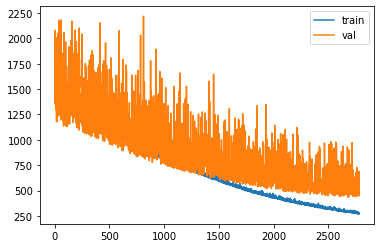

In [ ]:
# plt.figure(figsize=(13,10))
plt.plot(train_losses,label='train')
plt.plot(val_losses,label='val')
plt.legend()
plt.show()

In [ ]:
embeddings = []
with torch.no_grad():
    for data in val_dataset:
        embedding = best_model.get_codes(data.unsqueeze(0).cuda())
        embeddings += embedding.tolist()
embeddings = np.array(embeddings)

In [ ]:
%matplotlib inline
import sompy

Loaded backend module://matplotlib_inline.backend_inline version unknown.


In [ ]:
mapsize = [55,38]
som = sompy.SOMFactory.build(embeddings, mapsize)  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose=None)  # verbose='debug' will print more, and verbose=None wont print anything
cl = som.cluster(n_clusters=16)

/home/kikii-gpu5/study/sompy/visualization/mapview.py:139: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = self._fig.add_subplot(no_row_in_plot, no_col_in_plot,


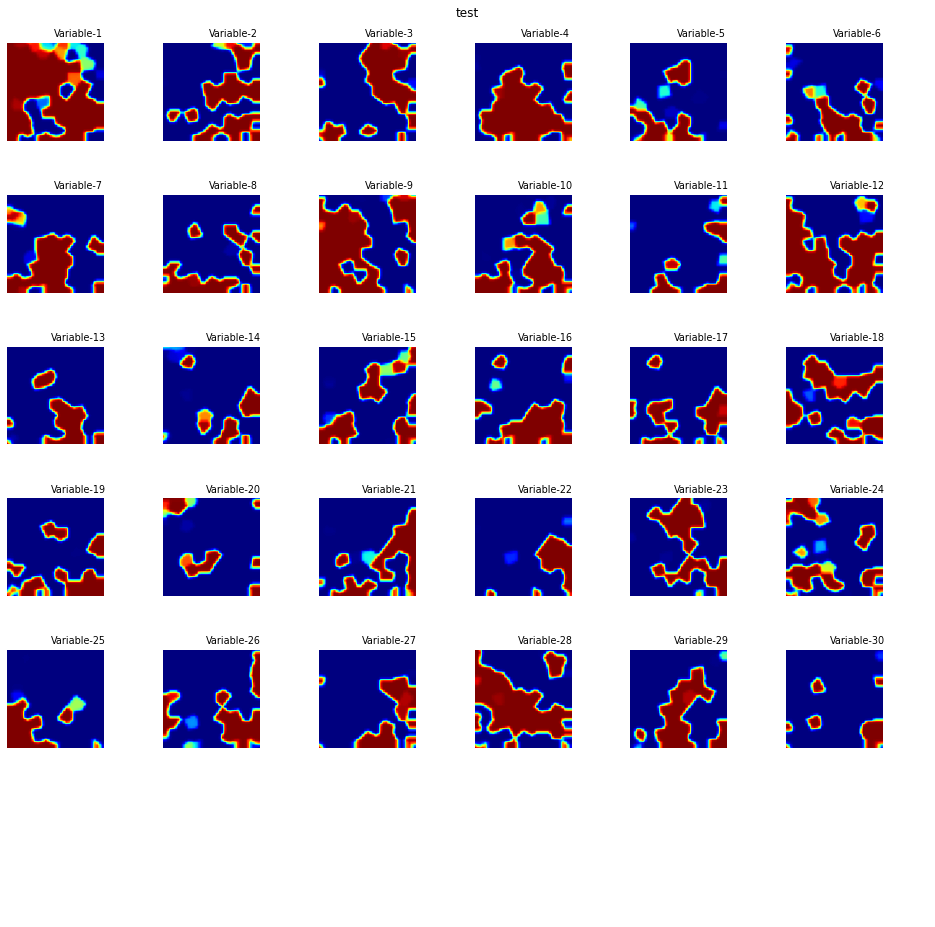

In [ ]:
# som.component_names = ['1','2']
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)
v.show(som, what='codebook', which_dim='all', cmap='jet', col_sz=6) #which_dim='all' default

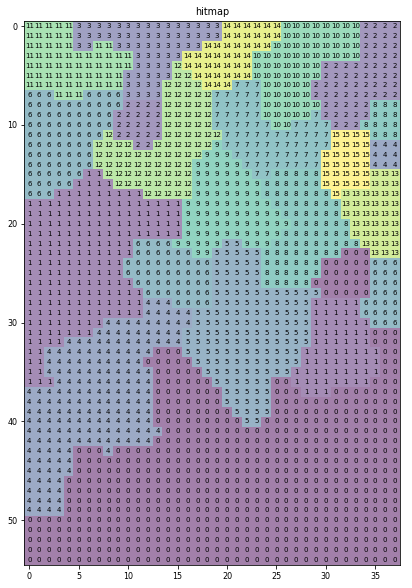

In [ ]:
h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=8, show_text=True)
h.show(som)

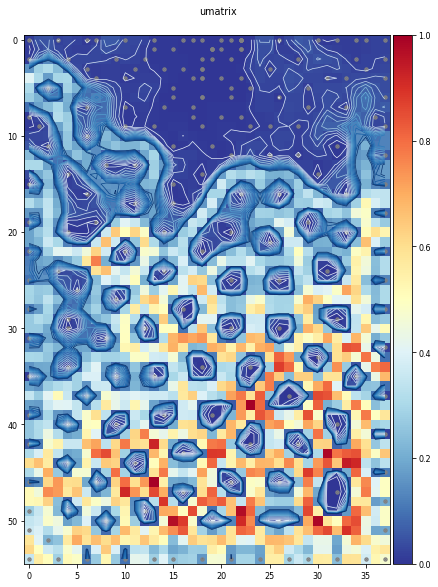

In [ ]:
u = sompy.umatrix.UMatrixView(10, 10, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance=1, row_normalized=False, contour=True, show_data=True, blob=False)

In [ ]:
embeddings_cluster = np.array([cl[i] for i in som.project_data(embeddings)])
event_data = np.array([i.tolist() for i in val_dataset])

In [ ]:
print('                    velocity |  acc  | yaw_rate | num_data')
for i in range(16):
    static_result = event_data[(embeddings_cluster==i)].mean(axis=1).mean(axis=0)
    print(f'cluster {i}  {(embeddings_cluster==i).sum()*100/len(embeddings_cluster):.2f}%  |  {static_result[0]:.2f}  |  {static_result[1]:.2f}  |  {static_result[2]:.2f}  |  {(embeddings_cluster==i).sum()}')

                    velocity |  acc  | yaw_rate | num_data
cluster 0  52.00%  |  27.02  |  0.85  |  -0.35  |  104
cluster 1  9.50%  |  5.46  |  -0.46  |  -1.10  |  19
cluster 2  3.00%  |  9.91  |  1.01  |  12.36  |  6
cluster 3  3.00%  |  1.51  |  0.01  |  -2.44  |  6
cluster 4  7.50%  |  29.12  |  -1.38  |  1.87  |  15
cluster 5  3.50%  |  15.77  |  1.44  |  16.58  |  7
cluster 6  5.00%  |  3.43  |  -0.39  |  0.86  |  10
cluster 7  1.50%  |  2.31  |  -0.78  |  -3.89  |  3
cluster 8  2.00%  |  11.52  |  -0.18  |  -9.92  |  4
cluster 9  1.50%  |  10.80  |  1.00  |  6.00  |  3
cluster 10  2.50%  |  8.95  |  -0.07  |  10.13  |  5
cluster 11  3.50%  |  7.03  |  -0.15  |  3.09  |  7
cluster 12  2.00%  |  1.00  |  -0.70  |  -10.10  |  4
cluster 13  1.50%  |  5.56  |  -0.13  |  12.11  |  3
cluster 14  1.50%  |  0.60  |  -0.62  |  -2.80  |  3
cluster 15  0.50%  |  2.80  |  0.60  |  0.27  |  1


2021-08-31 08:00:56,849	ERROR worker.py:475 -- print_logs: Connection closed by server.
2021-08-31 08:00:56,850	ERROR worker.py:1217 -- listen_error_messages_raylet: Connection closed by server.
2021-08-31 08:00:56,853	ERROR import_thread.py:88 -- ImportThread: Connection closed by server.
